# Assessing the quality of embeddings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc
from collections import OrderedDict
import seaborn as sns

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3), details (4)
sc.settings.set_figure_params(dpi=80, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

scanpy==1.2.0 anndata==0.6.4+6.gd9727ca numpy==1.13.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
title='KL={:.3f}, KL$_{{geo}}^{{disc}}$={:.3f}, KL$_{{geo}}^{{overl}}$={:.3f}'

## Simulated Data

In [3]:
adata = sc.datasets.krumsiek11()
adata.obs_names_make_unique()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'cell_type' as categorical


Compute the true graph.

In [4]:
sc.pp.neighbors(adata, n_neighbors=10)

In [5]:
sc.tl.diffmap(adata)

Now, let's go through several examples.

### Random Layout

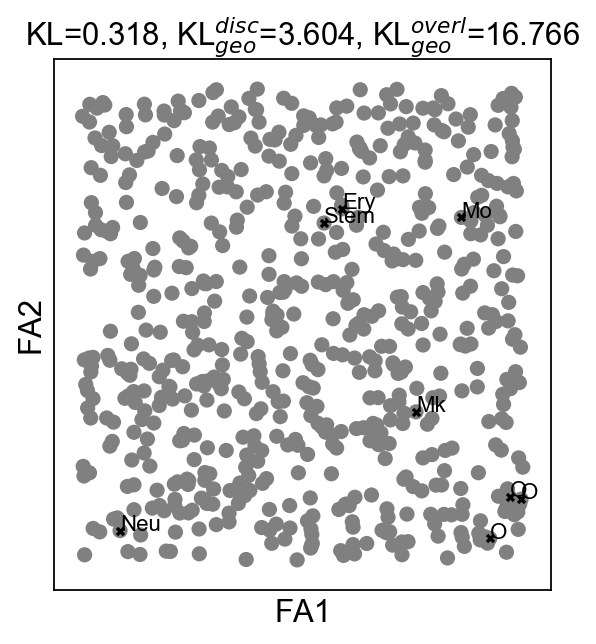

In [6]:
sc.tl.draw_graph(adata, maxiter=0) 
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o))

### tSNE

saving figure to file ./figures/tsne_krumsiek11.pdf


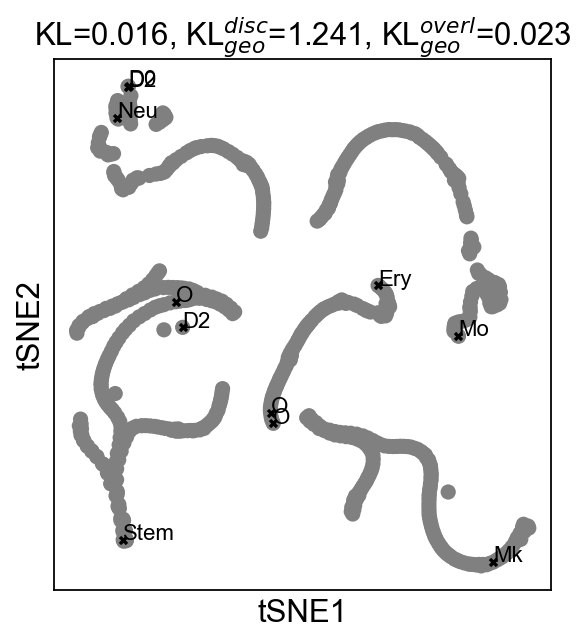

In [7]:
sc.tl.tsne(adata, perplexity=10)
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_tsne')
sc.pl.tsne(adata, title=title.format(ent, geo_d, geo_o), save='_krumsiek11')

### UMAP

saving figure to file ./figures/umap_krumsiek11.pdf


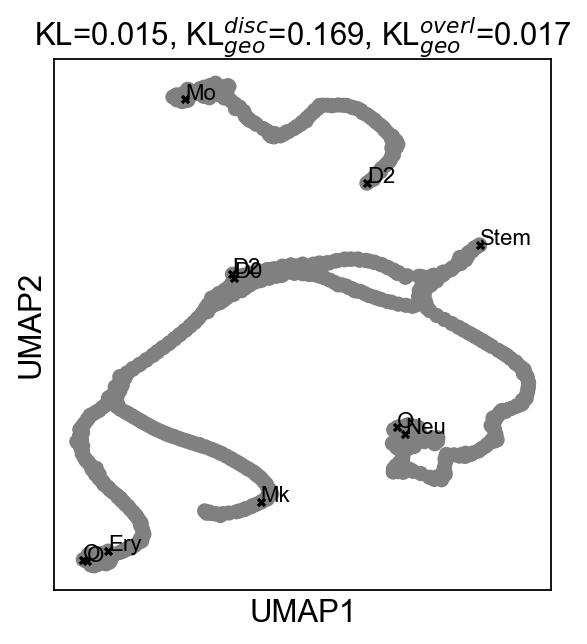

In [8]:
sc.tl.umap(adata)
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
sc.pl.umap(adata, title=title.format(ent, geo_d, geo_o), save='_krumsiek11')

### PAGA + UMAP

<Figure size 297.68x320 with 0 Axes>

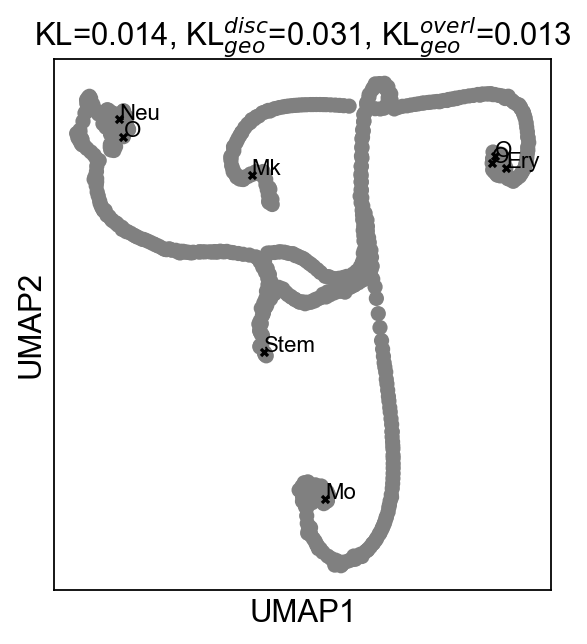

In [9]:
sc.tl.louvain(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, show=False)
pl.clf()
sc.tl.umap(adata, init_pos='paga')
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
sc.pl.umap(adata, title=title.format(ent, geo_d, geo_o))

### ForceAtlas2 (FA)

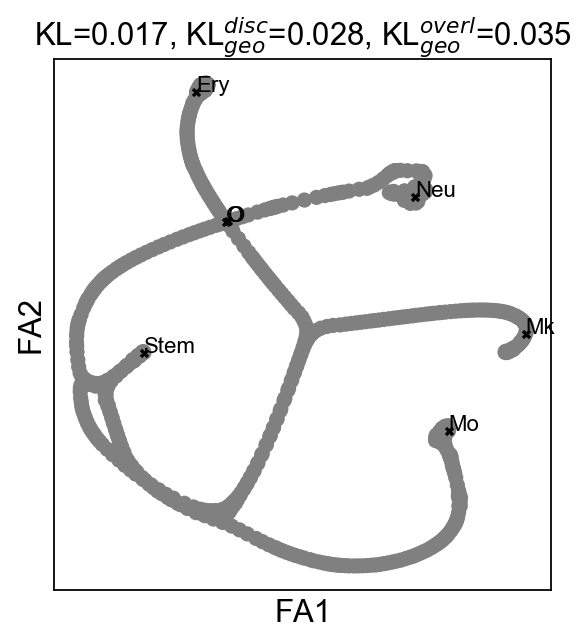

In [10]:
sc.tl.draw_graph(adata) 
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o))

saving figure to file ./figures/draw_graph_fa_krumsiek11.pdf


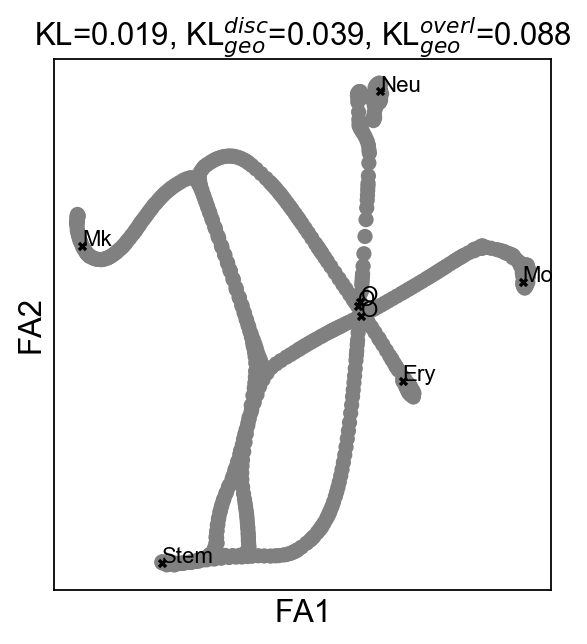

In [11]:
sc.tl.draw_graph(adata, random_state=2)
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o), save='_krumsiek11')

### PAGA + FA

saving figure to file ./figures/draw_graph_fa_krumsiek11_paga.pdf


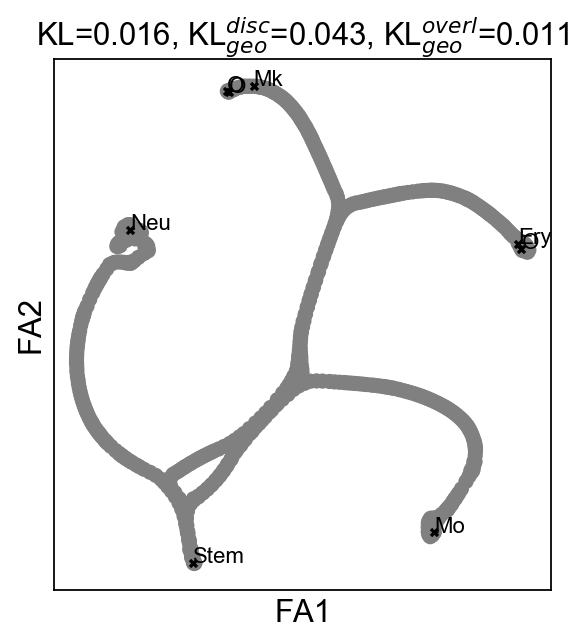

In [12]:
sc.tl.draw_graph(adata, init_pos='paga')
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
sc.pl.draw_graph(adata, legend_loc='on data', title=title.format(ent, geo_d, geo_o), save='_krumsiek11_paga')

### Get some statistics

In [13]:
# get statistics
statistics_ce = {'algorithm': [], 'values': []}
statistics_ged = {'algorithm': [], 'values': []}
statistics_geo = {'algorithm': [], 'values': []}

In [14]:
n_realizations = 10

tSNE.

In [15]:
for rs in range(n_realizations):
    sc.tl.tsne(adata, random_state=rs)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_tsne')
    statistics_ce['algorithm'].append('tSNE')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('tSNE')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('tSNE')
    statistics_geo['values'].append(geo_o)

UMAP.

In [16]:
for rs in range(n_realizations):
    sc.tl.umap(adata, random_state=rs)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
    statistics_ce['algorithm'].append('UMAP')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('UMAP')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('UMAP')
    statistics_geo['values'].append(geo_o)

UMAP + FA.

In [17]:
for rs in range(n_realizations):
    sc.tl.louvain(adata, random_state=rs)
    sc.tl.paga(adata)
    sc.pl.paga(adata, random_state=rs, show=False)
    pl.clf()
    sc.tl.umap(adata, init_pos='paga')    
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
    statistics_ce['algorithm'].append('PAGA\n+ UMAP')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('PAGA\n+ UMAP')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('PAGA\n+ UMAP')
    statistics_geo['values'].append(geo_o)

FA.

In [18]:
for rs in range(n_realizations):
    sc.tl.draw_graph(adata, random_state=rs)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
    statistics_ce['algorithm'].append('FA')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('FA')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('FA')
    statistics_geo['values'].append(geo_o)

PAGA + FA.

In [19]:
for rs in range(n_realizations):
    sc.tl.louvain(adata, random_state=rs)
    sc.tl.paga(adata)
    sc.pl.paga(adata, random_state=rs, show=False)
    pl.clf()
    sc.tl.draw_graph(adata, init_pos='paga')    
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
    statistics_ce['algorithm'].append('PAGA\n+ FA')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('PAGA\n+ FA')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('PAGA\n+ FA')
    statistics_geo['values'].append(geo_o)

Visualize the statistics.

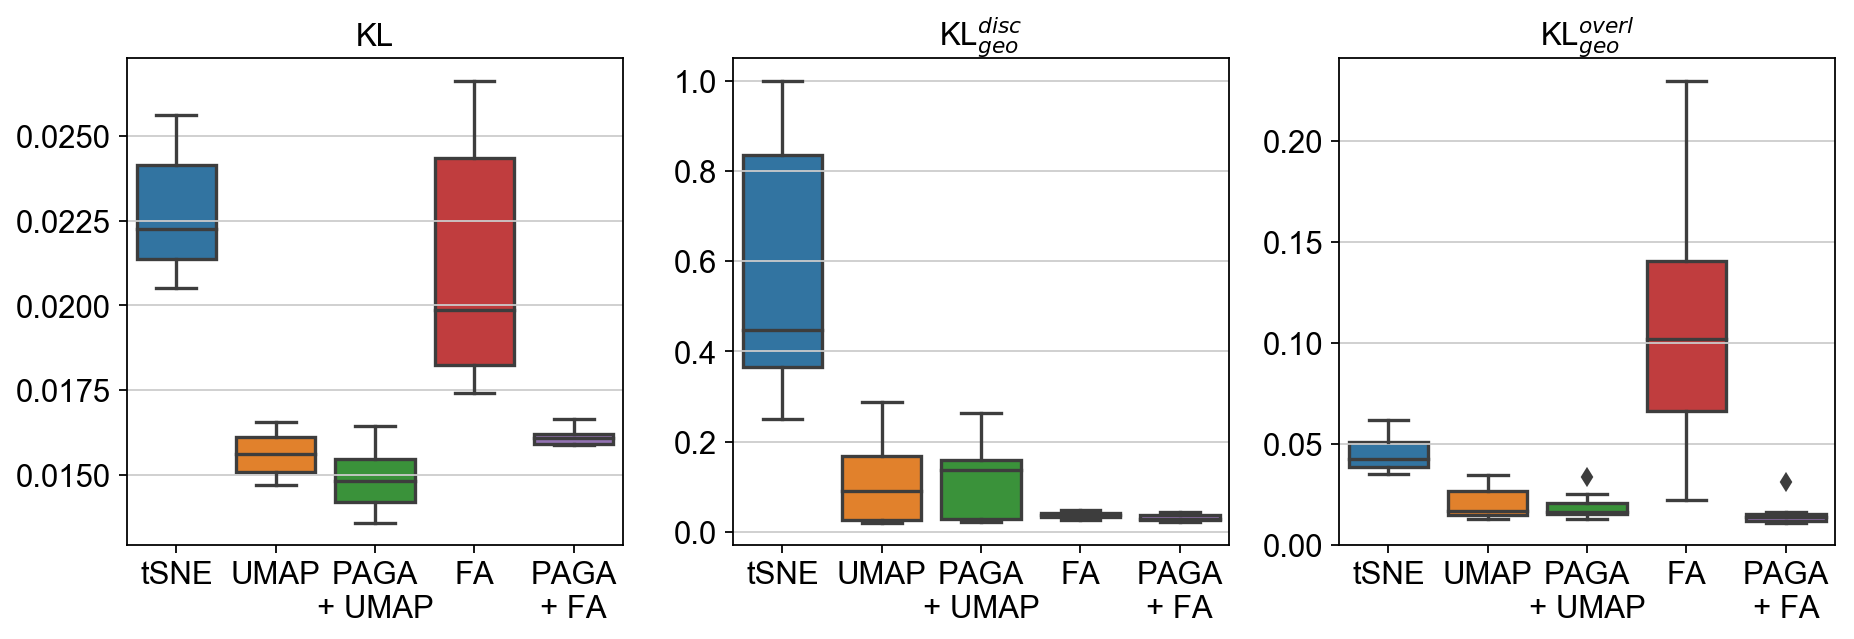

In [58]:
_, axs = pl.subplots(ncols=3, figsize=(12, 4), gridspec_kw={'left': 0.07, 'wspace': 0.22})
# df = pd.DataFrame(statistics_ce)
# df.to_csv('./write/krumsiek11_ce.csv')
df = pd.read_csv('./write/krumsiek11_ce.csv')
ax = sns.boxplot(x='algorithm', y='values', data=df, ax=axs[0])
ax.set_title('KL')
ax.set_ylabel('')
ax.set_xlabel('')
# df = pd.DataFrame(statistics_ged)
# df.to_csv('./write/krumsiek11_ged.csv')
df = pd.read_csv('./write/krumsiek11_ged.csv')
df.loc[df['values'] >= 1, 'values'] = 1        # cut off one outlier
ax = sns.boxplot(x='algorithm', y='values', data=df, ax=axs[1])
ax.set_title('KL$_{geo}^{disc}$')
ax.set_ylabel('')
ax.set_xlabel('')
# df = pd.DataFrame(statistics_geo)
# df.to_csv('./write/krumsiek11_geo.csv')
df = pd.read_csv('./write/krumsiek11_geo.csv')
df.loc[df['values'] >= 0.23, 'values'] = 0.23  # cut off one outlier
ax = sns.boxplot(x='algorithm', y='values', data=df, ax=axs[2])
ax.set_title('KL$_{geo}^{overl}$')
ax.set_ylabel('')
ax.set_xlabel('')
pl.savefig('./figures/krumsiek11_diff_embeddings.pdf', bbox_inches='tight')
pl.show()

## Early stopping

In [22]:
# get statistics
statistics_ce = {'algorithm': [], 'values': []}
statistics_ged = {'algorithm': [], 'values': []}
statistics_geo = {'algorithm': [], 'values': []}

In [23]:
n_realizations = 10
maxiter = 50

In [24]:
for rs in range(n_realizations):
    sc.tl.umap(adata, random_state=rs, init_pos='random', maxiter=maxiter)    
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
    statistics_ce['algorithm'].append('UMAP')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('UMAP')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('UMAP')
    statistics_geo['values'].append(geo_o)
    # sc.pl.umap(adata, title=title.format(ent, geo_d, geo_o))

In [25]:
for rs in range(n_realizations):
    sc.tl.louvain(adata, random_state=rs)
    sc.tl.paga(adata)
    sc.pl.paga(adata, random_state=rs, show=False)
    pl.clf()
    sc.tl.umap(adata, init_pos='paga', maxiter=maxiter)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
    statistics_ce['algorithm'].append('PAGA\n+ UMAP')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('PAGA\n+ UMAP')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('PAGA\n+ UMAP')
    statistics_geo['values'].append(geo_o)
    # sc.pl.umap(adata, title=title.format(ent, geo_d, geo_o))

In [26]:
for rs in range(n_realizations):
    sc.tl.draw_graph(adata, random_state=rs, maxiter=maxiter)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
    statistics_ce['algorithm'].append('FA')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('FA')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('FA')
    statistics_geo['values'].append(geo_o)
    # sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o))

In [27]:
for rs in range(n_realizations):
    sc.tl.louvain(adata, random_state=rs)
    sc.tl.paga(adata)
    sc.pl.paga(adata, random_state=rs, show=False)
    pl.clf()
    sc.tl.draw_graph(adata, init_pos='paga', maxiter=maxiter)    
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
    statistics_ce['algorithm'].append('PAGA\n+ FA')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('PAGA\n+ FA')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('PAGA\n+ FA')
    statistics_geo['values'].append(geo_o)
    # sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o))

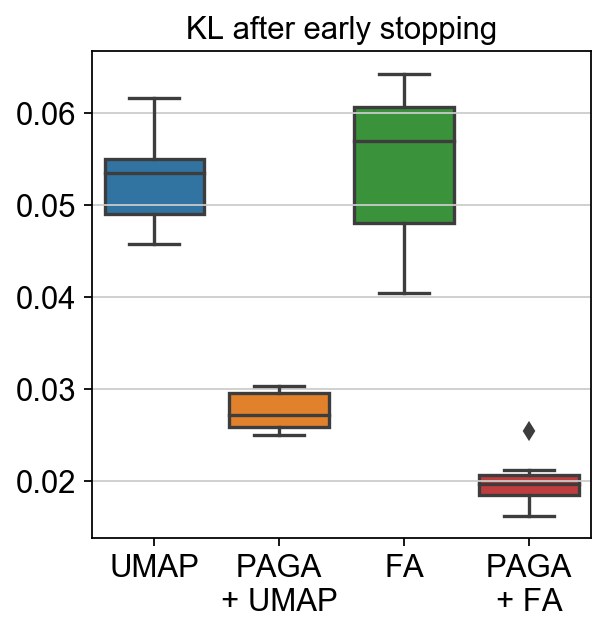

In [59]:
# df = pd.DataFrame(statistics_ce)
# df.to_csv('./write/krumsiek11_early_stopping.csv')
df = pd.read_csv('./write/krumsiek11_early_stopping.csv')
ax = sns.boxplot(x='algorithm', y='values', data=df)
ax.set_title('KL after early stopping')
ax.set_ylabel('')
ax.set_xlabel('')
pl.savefig('./figures/krumsiek11_early_stopping.pdf', bbox_inches='tight')
pl.show()

## Paul et al. (2015)

In [30]:
adata = sc.read('../blood/paul15/write/paul15_denoised.h5ad')

In [31]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

### tSNE

saving figure to file ./figures/tsne_paul15.pdf


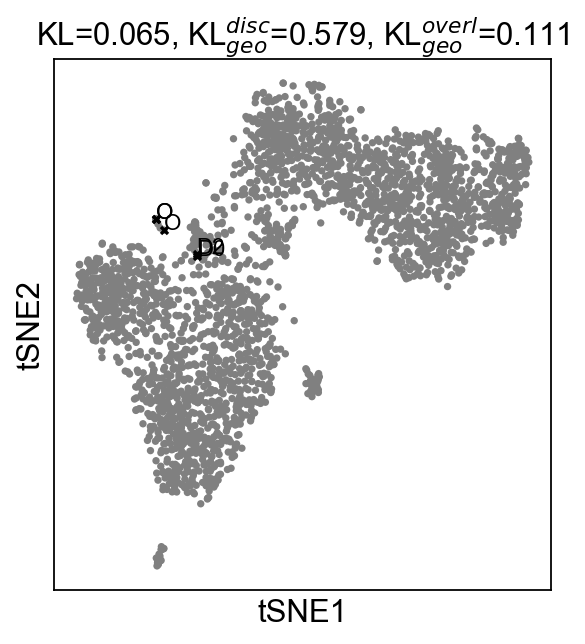

In [32]:
sc.tl.tsne(adata)
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_tsne')
sc.pl.tsne(adata, title=title.format(ent, geo_d, geo_o), save='_paul15')

### UMAP

saving figure to file ./figures/umap_paul15.pdf


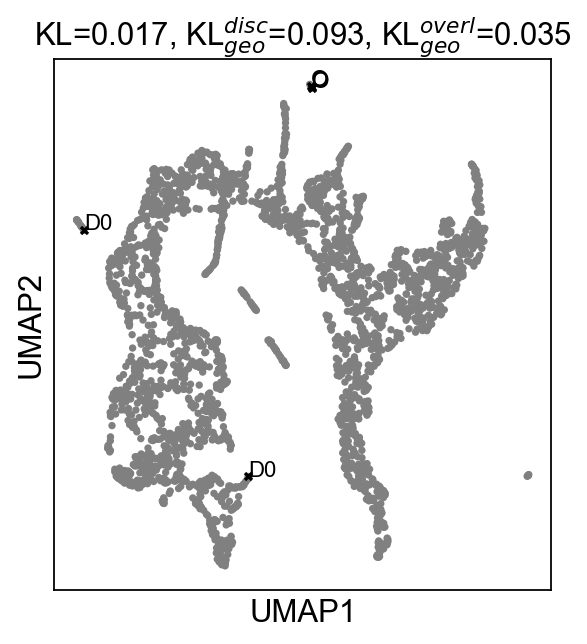

In [33]:
sc.tl.umap(adata)
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
sc.pl.umap(adata, title=title.format(ent, geo_d, geo_o), save='_paul15')

### PAGA + UMAP

On the denoised graph, PAGA initialization does not seem to work well, for some reason.

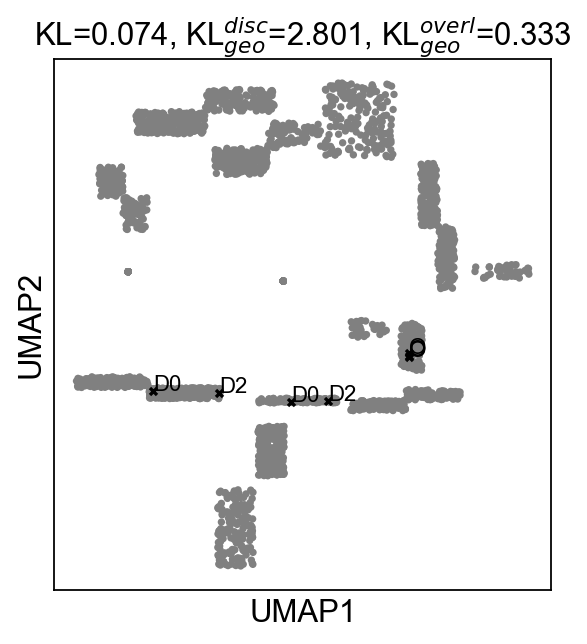

In [34]:
sc.tl.umap(adata, init_pos='paga')
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
sc.pl.umap(adata, title=title.format(ent, geo_d, geo_o))

### FA

saving figure to file ./figures/draw_graph_fa_paul15.pdf


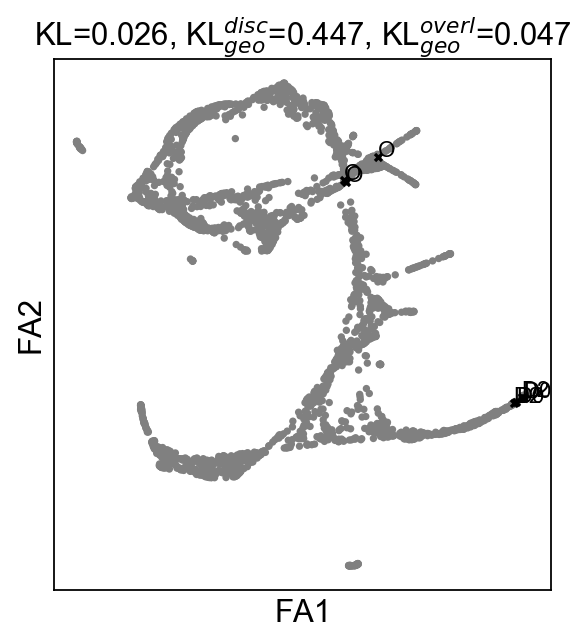

In [35]:
sc.tl.draw_graph(adata)
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o), save='_paul15')

### PAGA + FA

saving figure to file ./figures/draw_graph_fa_paul15_paga.pdf


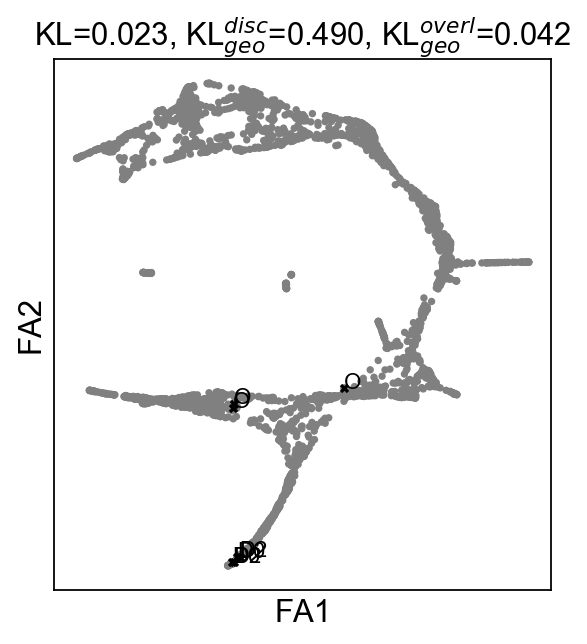

In [36]:
sc.tl.draw_graph(adata, init_pos='paga')
ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o), save='_paul15_paga')

### Get some statistics

In [37]:
# get statistics
statistics_ce = {'algorithm': [], 'values': []}
statistics_ged = {'algorithm': [], 'values': []}
statistics_geo = {'algorithm': [], 'values': []}

In [38]:
n_realizations = 5

tSNE.

In [39]:
for rs in range(n_realizations):
    sc.tl.tsne(adata, random_state=rs)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_tsne')
    statistics_ce['algorithm'].append('tSNE')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('tSNE')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('tSNE')
    statistics_geo['values'].append(geo_o)

UMAP.

In [40]:
for rs in range(n_realizations):
    sc.tl.umap(adata, random_state=rs)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
    statistics_ce['algorithm'].append('UMAP')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('UMAP')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('UMAP')
    statistics_geo['values'].append(geo_o)

UMAP + FA.

In [41]:
for rs in range(n_realizations):
    sc.tl.louvain(adata, random_state=rs)
    sc.tl.paga(adata)
    sc.pl.paga(adata, random_state=rs, show=False)
    pl.clf()
    sc.tl.umap(adata, init_pos='paga')    
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
    statistics_ce['algorithm'].append('PAGA\n+ UMAP')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('PAGA\n+ UMAP')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('PAGA\n+ UMAP')
    statistics_geo['values'].append(geo_o)

FA.

In [42]:
for rs in range(n_realizations):
    sc.tl.draw_graph(adata, random_state=rs)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
    statistics_ce['algorithm'].append('FA')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('FA')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('FA')
    statistics_geo['values'].append(geo_o)

PAGA + FA.

In [43]:
for rs in range(n_realizations):
    sc.tl.louvain(adata, random_state=rs)
    sc.tl.paga(adata)
    sc.pl.paga(adata, random_state=rs, show=False)
    pl.clf()
    sc.tl.draw_graph(adata, init_pos='paga')    
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
    statistics_ce['algorithm'].append('PAGA\n+ FA')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('PAGA\n+ FA')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('PAGA\n+ FA')
    statistics_geo['values'].append(geo_o)

Visualize the statistics.

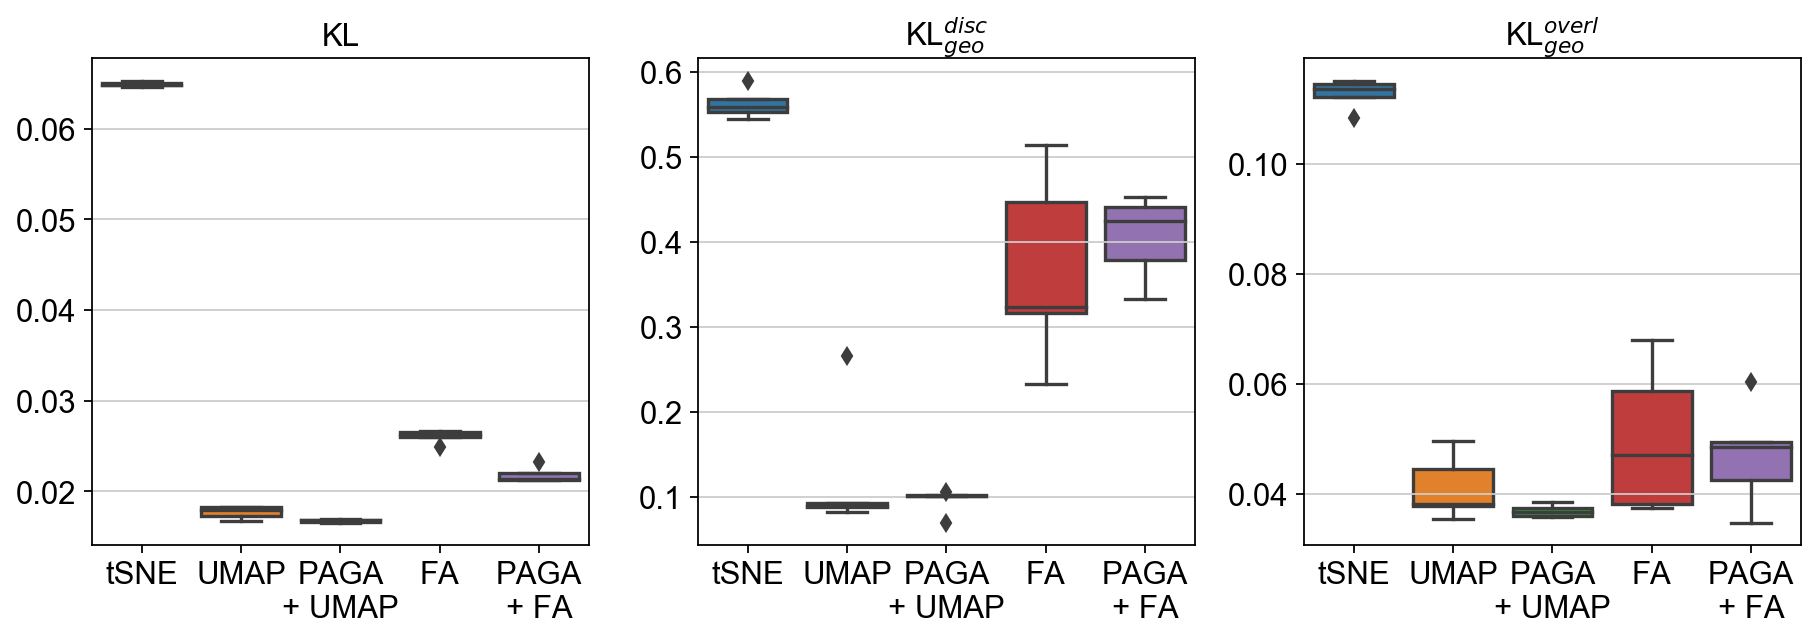

In [60]:
_, axs = pl.subplots(ncols=3, figsize=(12, 4), gridspec_kw={'left': 0.07, 'wspace': 0.22})
# df = pd.DataFrame(statistics_ce)
# df.to_csv('./write/paul15_ce.csv')
df = pd.read_csv('./write/paul15_ce.csv')
ax = sns.boxplot(x='algorithm', y='values', data=df, ax=axs[0])
ax.set_title('KL')
ax.set_ylabel('')
ax.set_xlabel('')
# df = pd.DataFrame(statistics_ged)
# df.to_csv('./write/paul15_ged.csv')
df = pd.read_csv('./write/paul15_ged.csv')
df.loc[df['values'] >= 1, 'values'] = 1
ax = sns.boxplot(x='algorithm', y='values', data=df, ax=axs[1])
ax.set_title('KL$_{geo}^{disc}$')
ax.set_ylabel('')
ax.set_xlabel('')
# df = pd.DataFrame(statistics_geo)
# df.to_csv('./write/paul15_geo.csv')
df = pd.read_csv('./write/paul15_geo.csv')
ax = sns.boxplot(x='algorithm', y='values', data=df, ax=axs[2])
ax.set_title('KL$_{geo}^{overl}$')
ax.set_ylabel('')
ax.set_xlabel('')
pl.savefig('./figures/paul15_diff_embeddings.pdf', bbox_inches='tight')
pl.show()

## Early stopping

In [45]:
# get statistics
statistics_ce = {'algorithm': [], 'values': []}
statistics_ged = {'algorithm': [], 'values': []}
statistics_geo = {'algorithm': [], 'values': []}

In [46]:
n_realizations = 5
maxiter = 50

In [47]:
for rs in range(n_realizations):
    sc.tl.umap(adata, random_state=rs, init_pos='random', maxiter=maxiter)    
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
    statistics_ce['algorithm'].append('UMAP')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('UMAP')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('UMAP')
    statistics_geo['values'].append(geo_o)
    # sc.pl.umap(adata, title=title.format(ent, geo_d, geo_o))

In [48]:
for rs in range(n_realizations):
    sc.tl.louvain(adata, random_state=rs)
    sc.tl.paga(adata)
    sc.pl.paga(adata, random_state=rs, show=False)
    pl.clf()
    sc.tl.umap(adata, init_pos='paga', maxiter=maxiter)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_umap')
    statistics_ce['algorithm'].append('PAGA\n+ UMAP')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('PAGA\n+ UMAP')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('PAGA\n+ UMAP')
    statistics_geo['values'].append(geo_o)
    # sc.pl.umap(adata, title=title.format(ent, geo_d, geo_o))

In [49]:
for rs in range(n_realizations):
    sc.tl.draw_graph(adata, random_state=rs, maxiter=maxiter)
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
    statistics_ce['algorithm'].append('FA')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('FA')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('FA')
    statistics_geo['values'].append(geo_o)
    # sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o))

In [50]:
for rs in range(n_realizations):
    sc.tl.louvain(adata, random_state=rs)
    sc.tl.paga(adata)
    sc.pl.paga(adata, random_state=rs, show=False)
    pl.clf()
    sc.tl.draw_graph(adata, init_pos='paga', maxiter=maxiter)    
    ent, geo_d, geo_o = sc.utils.cross_entropy_neighbors_in_rep(adata, use_rep='X_draw_graph_fa')
    statistics_ce['algorithm'].append('PAGA\n+ FA')
    statistics_ce['values'].append(ent)
    statistics_ged['algorithm'].append('PAGA\n+ FA')
    statistics_ged['values'].append(geo_d)
    statistics_geo['algorithm'].append('PAGA\n+ FA')
    statistics_geo['values'].append(geo_o)
    # sc.pl.draw_graph(adata, title=title.format(ent, geo_d, geo_o))

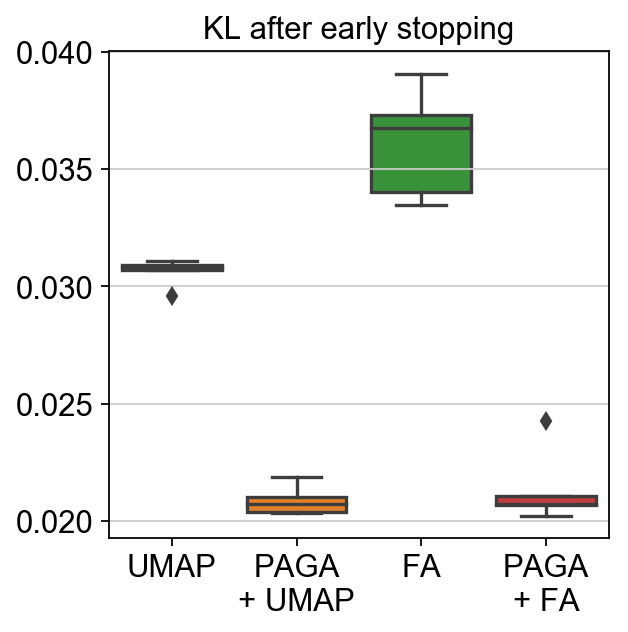

In [61]:
# df = pd.DataFrame(statistics_ce)
# df.to_csv('./write/paul15_early_stopping.csv')
df = pd.read_csv('./write/paul15_early_stopping.csv')
ax = sns.boxplot(x='algorithm', y='values', data=df)
ax.set_title('KL after early stopping')
ax.set_ylabel('')
ax.set_xlabel('')
pl.savefig('./figures/paul15_early_stopping.pdf', bbox_inches='tight')
pl.show()